# Downloading Data for Local Use

These commands download all the necessary data to work locally for convenience.  
Note: The `aws configure` command requires your AWS Access Key ID and Secret Access Key, which should be stored securely in a `.env` file that is ignored by Git (via `.gitignore`).  
A `ls` command is run beforehand to ensure no file names are misdefined.

```bash
aws configure

poetry run aws s3 ls s3://zrive-ds-data/groceries/box_builder_dataset/
poetry run aws s3 cp s3://zrive-ds-data/groceries/box_builder_dataset/feature_frame.csv ./feature_frame.csv

Añadir dependencia: poetry add scikit-learn

In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib
from typing import Tuple
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, auc 
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler

plt.style.use("bmh")

In [15]:
RUTE = "../../data/"
FEATURE_FRAME_CSV = f"{RUTE}feature_frame.csv"

In [16]:
feature_frame = pd.read_csv(FEATURE_FRAME_CSV)
feature_frame.head()

,variant_id,product_type,order_id,user_id,created_at,order_date,user_order_seq,outcome,ordered_before,abandoned_before,...,count_children,count_babies,count_pets,people_ex_baby,days_since_purchase_variant_id,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type
0,33826472919172,ricepastapulses,2807985930372,3482464092292,2020-10-05 16:46:19,2020-10-05 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
1,33826472919172,ricepastapulses,2808027644036,3466586718340,2020-10-05 17:59:51,2020-10-05 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
2,33826472919172,ricepastapulses,2808099078276,3481384026244,2020-10-05 20:08:53,2020-10-05 00:00:00,4,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
3,33826472919172,ricepastapulses,2808393957508,3291363377284,2020-10-06 08:57:59,2020-10-06 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
4,33826472919172,ricepastapulses,2808429314180,3537167515780,2020-10-06 10:37:05,2020-10-06 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618


In [17]:
feature_frame.tail()

,variant_id,product_type,order_id,user_id,created_at,order_date,user_order_seq,outcome,ordered_before,abandoned_before,...,count_children,count_babies,count_pets,people_ex_baby,days_since_purchase_variant_id,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type
2880544,33826439594116,healthcarevitamins,3643254800516,3893722808452,2021-03-03 13:19:28,2021-03-03 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,34.0,27.693045,30.0,34.0,27.451392
2880545,33826439594116,healthcarevitamins,3643274788996,3883757174916,2021-03-03 13:57:35,2021-03-03 00:00:00,4,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,34.0,27.693045,30.0,34.0,27.451392
2880546,33826439594116,healthcarevitamins,3643283734660,3874925314180,2021-03-03 14:14:24,2021-03-03 00:00:00,7,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,34.0,27.693045,30.0,34.0,27.451392
2880547,33826439594116,healthcarevitamins,3643294515332,3906490826884,2021-03-03 14:30:30,2021-03-03 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,34.0,27.693045,30.0,34.0,27.451392
2880548,33826439594116,healthcarevitamins,3643301986436,3914253959300,2021-03-03 14:42:05,2021-03-03 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,34.0,27.693045,30.0,34.0,27.451392


Las filas están ordenadas de más antigua a más reciente

In [5]:
feature_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880549 entries, 0 to 2880548
Data columns (total 27 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   variant_id                        int64  
 1   product_type                      object 
 2   order_id                          int64  
 3   user_id                           int64  
 4   created_at                        object 
 5   order_date                        object 
 6   user_order_seq                    int64  
 7   outcome                           float64
 8   ordered_before                    float64
 9   abandoned_before                  float64
 10  active_snoozed                    float64
 11  set_as_regular                    float64
 12  normalised_price                  float64
 13  discount_pct                      float64
 14  vendor                            object 
 15  global_popularity                 float64
 16  count_adults                      fl

In [6]:
feature_frame["outcome"].value_counts()

outcome
0.0    2847317
1.0      33232
Name: count, dtype: int64

In [18]:
info_cols = ["variant_id", "order_id", "user_id", "created_at", "order_date"]
label_col = ["outcome"]

features_cols = [col for col in feature_frame.columns if col not in info_cols + label_col]

categorical_cols = ["product_type", "vendor"]
binary_cols = ["ordered_before", "abandoned_before", "active_snoozed", "set_as_regular"]

numerical_cols = [col for col in features_cols if col not in categorical_cols + binary_cols]

In [ ]:
def push_relevant_dataframe (df: pd.DataFrame, min_products: int = 5) -> pd.DataFrame: 
    """We are only interested in big enough orders that are profitable"""
    order_size = df.groupby("order_id").outcome.sum()
    orders_of_min_size = order_size [order_size >= min_products].index 
    return df.loc[lambda x: x.order_id.isin (orders_of_min_size)]

df_selected = (
    feature_frame.pipe(push_relevant_dataframe)
    .assign(created_at=lambda x: pd.to_datetime (x.created_at))
    .assign(order_date=lambda x: pd.to_datetime(x.order_date).dt.date)
)

In [8]:
df_selected["outcome"].value_counts()

outcome
0.0    2132624
1.0      31329
Name: count, dtype: int64

In [9]:
daily_orders = df_selected.groupby("order_date").order_id.nunique()
daily_orders.head()

order_date
2020-10-05     3
2020-10-06     7
2020-10-07     6
2020-10-08    12
2020-10-09     4
Name: order_id, dtype: int64

Text(0.5, 1.0, 'Daily Orders')

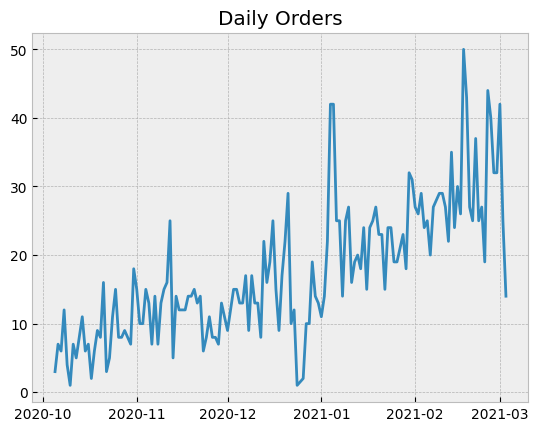

In [11]:
plt.plot(daily_orders, label="Daily orders")
plt.title("Daily Orders")

- Opciones para distribuir los datos:
Random, Stratify, Temporal Split 

- Como se muestra en la gráfica, ha habido un aumento en el numero de orders diarias con el paso del tiempo. Esto refleja un cambio en el negocio. Además, como en producción tendríamos el modelo y tomaríamos las predicciones en función del histórico de orders, decidimos reflejar el tiempo de la misma forma a la hora de entrenar el modelo. Esto significa que los conjuntos train, validation y test irán ordenados de más lejano a más cercano en el tiempo.

- Posibles problemas:
Muchas orders recientes que haga que las fechas de los cutoffs estén muy desbalanceadas y pueda no aprender patrones como estacionalidad, días o semanas concretas (fiestas, Black Friday, ...)

- Solución: 
Entender el ciclo del negocio, y fijar el tiempo del ciclo

In [10]:
cumsum_daily_orders = daily_orders.cumsum() / daily_orders.sum()
train_val_cutoff = cumsum_daily_orders [cumsum_daily_orders <= 0.7].idxmax() 
val_test_cutoff = cumsum_daily_orders [cumsum_daily_orders <= 0.9].idxmax()

print("Train since:", cumsum_daily_orders.index.min())
print("Train until:", train_val_cutoff)
print("Val until:", val_test_cutoff)
print("Test until:", cumsum_daily_orders.index.max())

Train since: 2020-10-05
Train until: 2021-02-04
Val until: 2021-02-22
Test until: 2021-03-03


In [11]:
train_df = df_selected [df_selected.order_date <= train_val_cutoff]
val_df = df_selected [
    (df_selected.order_date > train_val_cutoff)
    & (df_selected.order_date <= val_test_cutoff)
]
test_df = df_selected [df_selected.order_date > val_test_cutoff]

Text(0.5, 0, 'Date')

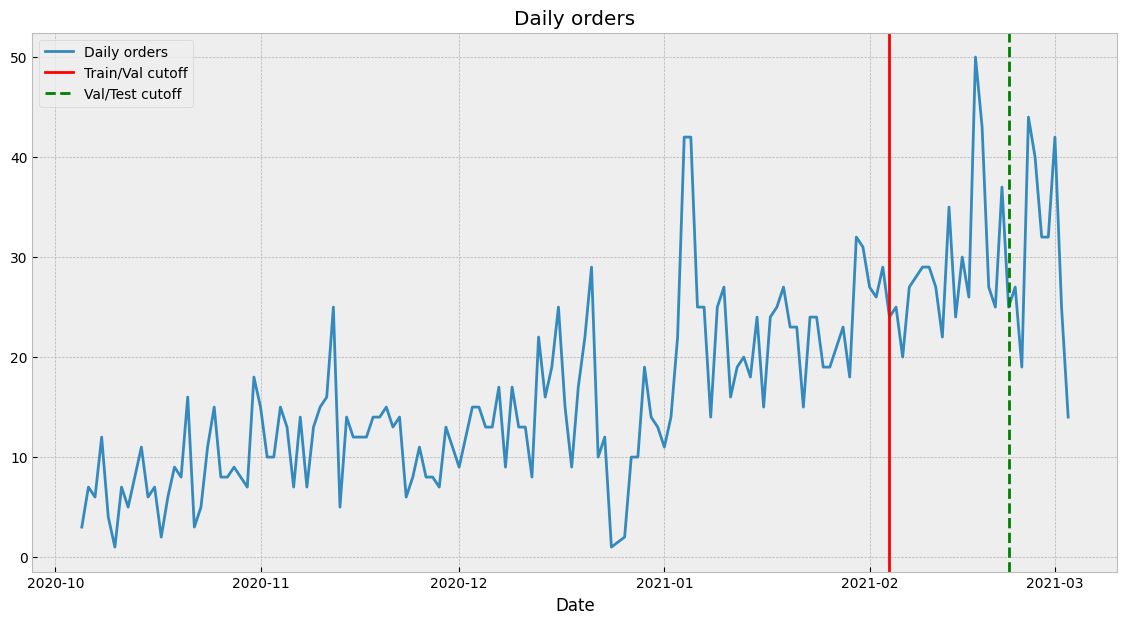

In [14]:
fix, ax = plt.subplots(1, 1, figsize=(14, 7)) 
daily_orders.plot(label="Daily orders", ax=ax)
ax.axvline(train_val_cutoff, color="red", linestyle="-", label="Train/Val cutoff") 
ax.axvline(val_test_cutoff, color="green", linestyle="--", label="Val/Test cutoff")
ax.legend()
ax.set_title("Daily orders")
ax.set_xlabel("Date")

### Baseline: 
Como hemos comentado anteriormente, usamos global popularity como baseline. De esta manera, veremos si merece la pena tener nuestro modelo en producción consumiendo recursos.

In [ ]:

def plot_metrics( 
    model_name: str, 
    y_pred: pd.Series, 
    y_test: pd.Series,
    target_precision: float = 0.05,
    figure: Tuple [matplotlib.figure. Figure, np.array] = None,
):
    precision_, recall_, _ = precision_recall_curve(y_test, y_pred) 
    pr_auc = auc(recall_, precision_)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = roc_auc_score (y_test, y_pred)
    if figure is None:
        fig, ax = plt.subplots(1, 2, figsize=(14, 7))
    else:
        fig, ax = figure

    ax[0].plot(recall_, precision_, label=f"{model_name}; AUC: {pr_auc:.2f}")
    ax[0].set_xlabel("recall")
    ax[0].set_ylabel("precision")
    ax[0].set_title(f"Precision-recall Curve")
    ax[0].legend()
    ax[1].plot(fpr, tpr, label=f"AUC: {roc_auc:.2f}")
    ax[1].set_xlabel("FPR")
    ax[1].set_ylabel("TPR")
    ax[1].set_title("ROC Curve")
    ax[1].legend()

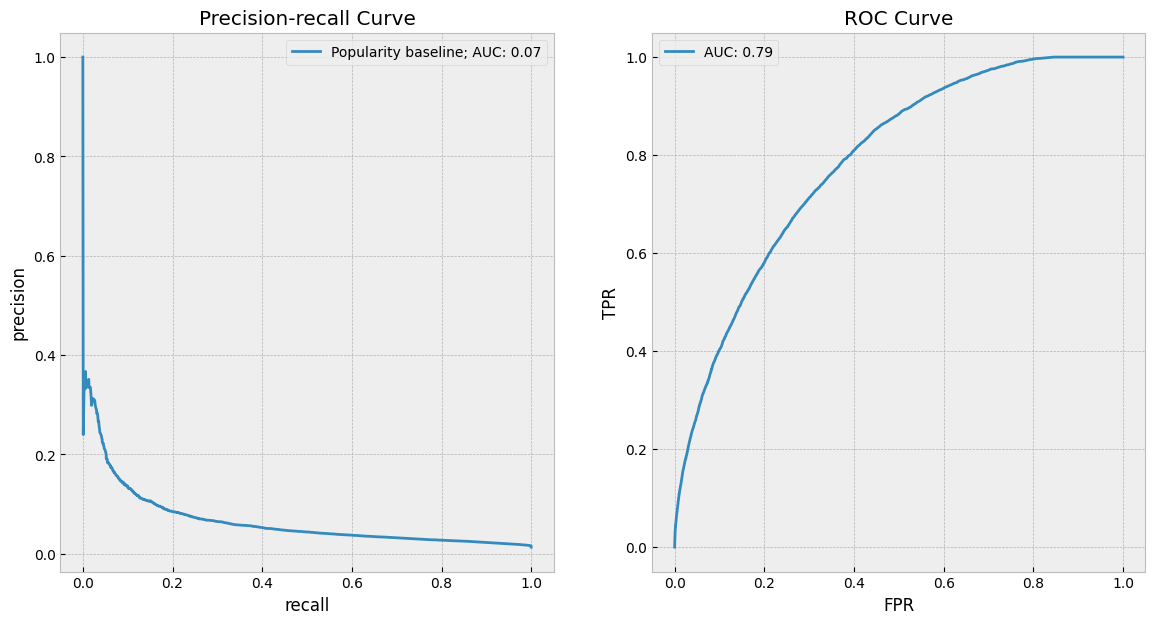

In [13]:
plot_metrics(
    "Popularity baseline", y_pred=val_df["global_popularity"], y_test=val_df[label_col]
)

### Model training

In [17]:
def feature_label_split(df: pd.DataFrame, label_col: str )-> Tuple [pd.DataFrame, pd. Series]:
    return df.drop(label_col, axis=1), df[label_col]

X_train, y_train = feature_label_split(train_df, label_col)
X_val, y_val = feature_label_split(val_df, label_col)
X_test, y_test = feature_label_split(test_df, label_col)

In [18]:
# Dejo fuera las variables categóricas para ver si merece la pena más tarde el coste de su tratamiento

train_cols = numerical_cols + binary_cols

### Ridge regression

c:\Users\eduez\AppData\Local\pypoetry\Cache\virtualenvs\zrive-ds-tukR1ct--py3.11\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eduez\AppData\Local\pypoetry\Cache\virtualenvs\zrive-ds-tukR1ct--py3.11\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eduez\AppData\Local\pypoetry\Cache\virtualenvs\zrive-ds-tukR1ct--py3.11\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eduez\AppData\Local\pypoe

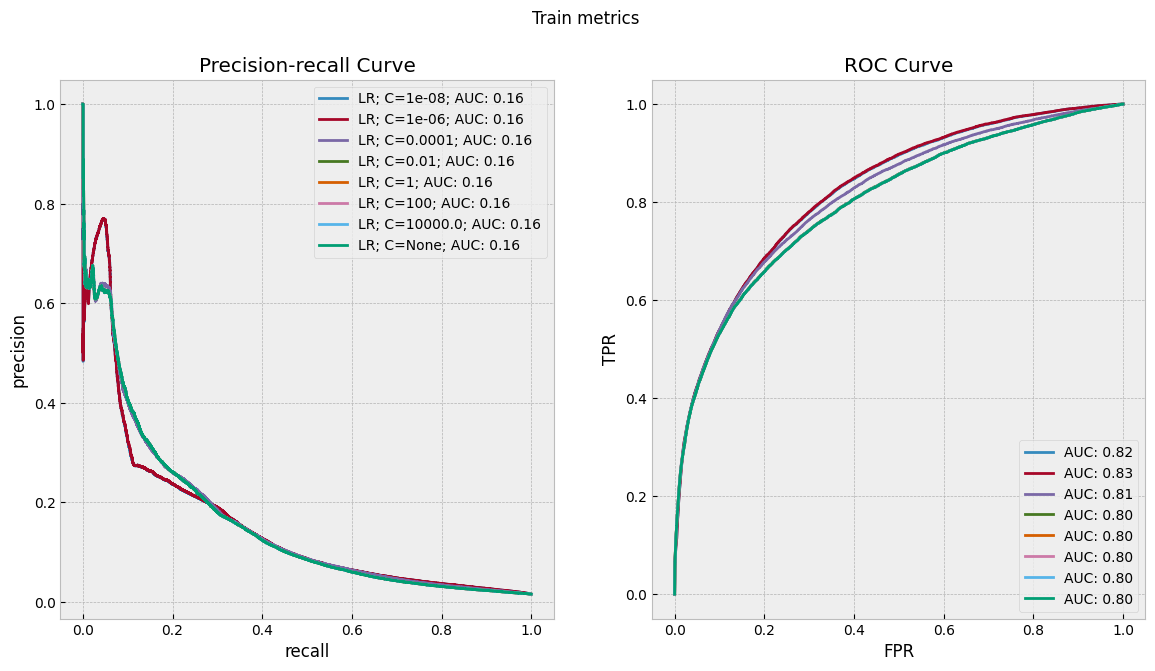

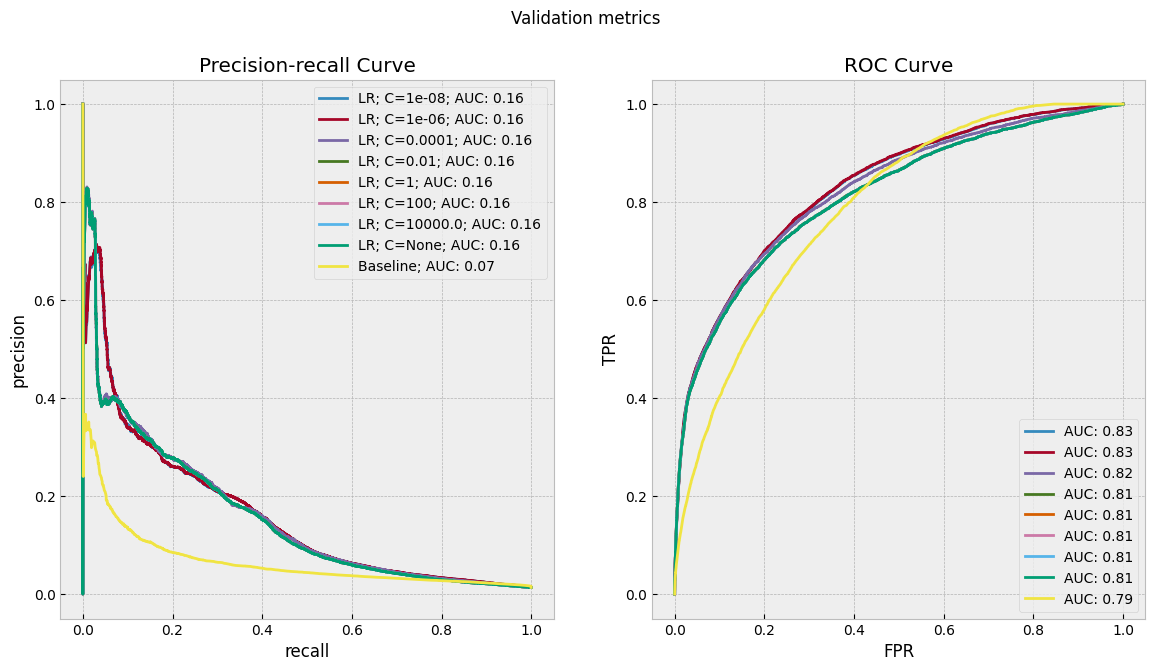

In [19]:
fig1, ax1 = plt.subplots(1, 2, figsize=(14, 7))
fig1.suptitle("Train metrics")

fig2, ax2 = plt.subplots(1, 2, figsize=(14, 7))
fig2.suptitle("Validation metrics")

cs = [1e-8, 1e-6, 1e-4, 1e-2, 1, 100, 1e4, None]  # 1/alpha values

for c in cs:
    lr = make_pipeline(
        StandardScaler(),
        LogisticRegression(penalty="l2", C=c if c else 1.0) # L2 = Ridge
    )

    lr.fit(X_train[train_cols], y_train)
    train_proba = lr.predict_proba(X_train[train_cols])[:, 1]
    
    plot_metrics(
        f"LR; C={c}", y_pred=train_proba, y_test=train_df[label_col], figure=(fig1, ax1)
    )

    val_proba = lr.predict_proba(X_val[train_cols])[:, 1]
    
    plot_metrics(
        f"LR; C={c}", y_pred=val_proba, y_test=val_df[label_col], figure=(fig2, ax2)
    )

plot_metrics(
    "Baseline",
    y_pred=val_df["global_popularity"],
    y_test=val_df[label_col],
    figure=(fig2, ax2),
)

- Train and validation metrics are pretty much the same. There is no overfitting.
- Large regularisation seem to help (somewhat better than None) in terms of ROC AUC.
- However, this is a very biased dataset lots of Negatives. The area of the ROC curve where there are differences starts with FPR > 0.3. Since most cases will be negative a FPR of 30% would mean labeling a lot of instances as positives, most of them being FP.
- On the precision-recall curve, regularisation has little to no impact in the AUC. With large regularisation penalties, the shape of the curve changes for precision > 0.4. We would need to confirm that the change in shape is real, and if so we could choose which models better suits us depending on which point of the curve we want to work with.

### Lasso Regression

c:\Users\eduez\AppData\Local\pypoetry\Cache\virtualenvs\zrive-ds-tukR1ct--py3.11\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eduez\AppData\Local\pypoetry\Cache\virtualenvs\zrive-ds-tukR1ct--py3.11\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eduez\AppData\Local\pypoetry\Cache\virtualenvs\zrive-ds-tukR1ct--py3.11\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eduez\AppData\Local\pypoe

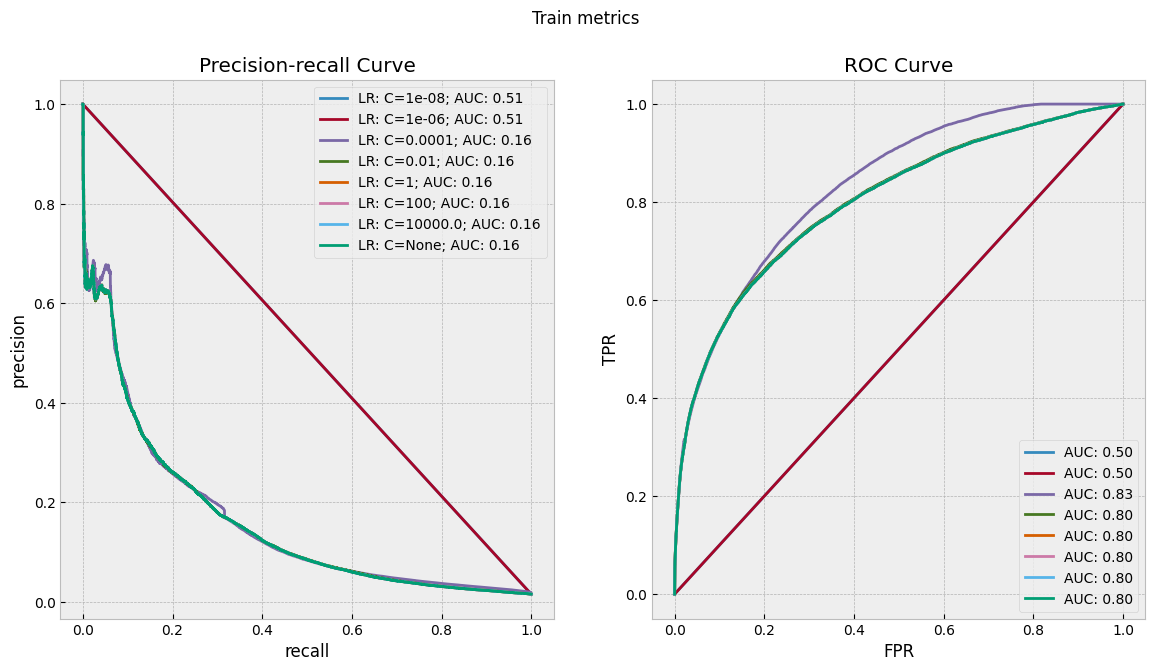

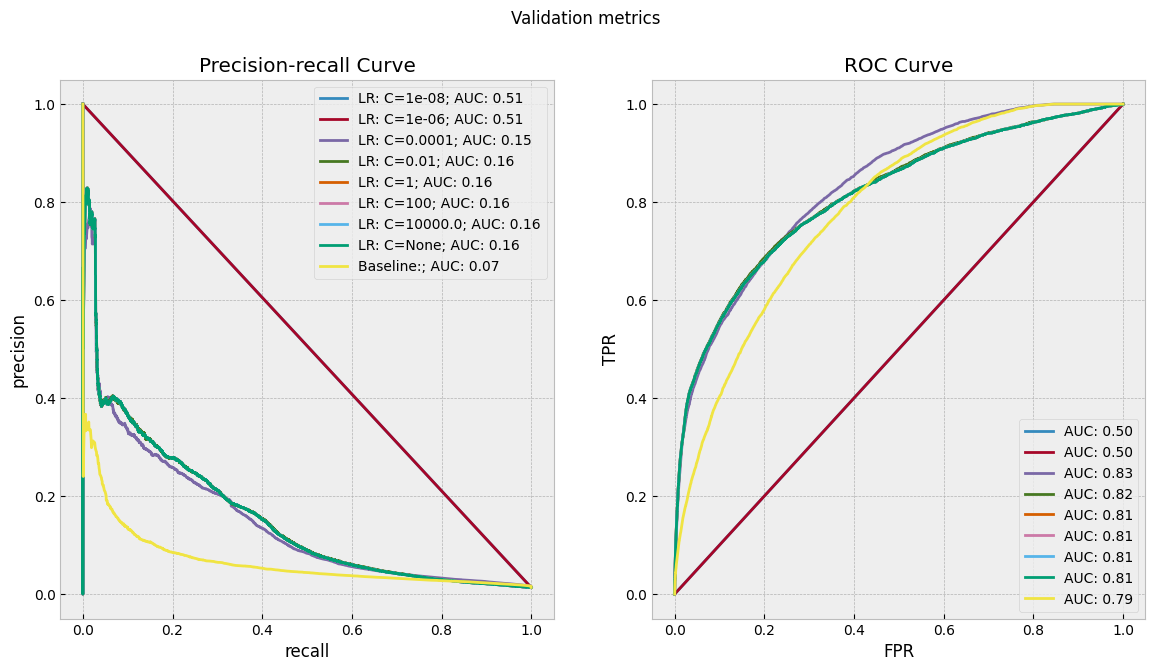

In [20]:
fig1, ax1 = plt.subplots(1, 2, figsize=(14, 7))
fig1.suptitle("Train metrics")

fig2, ax2 = plt.subplots(1, 2, figsize=(14, 7))
fig2.suptitle("Validation metrics")

cs = [1e-8, 1e-6, 1e-4, 1e-2, 1, 100, 1e4, None]
cmap = plt.get_cmap("Paired")

for c in cs:
    lr = make_pipeline(
        StandardScaler(),
        LogisticRegression(
            penalty="l1", C=c if c else 1.0, solver="saga" # L1 = Lasso
        ),
    )

    lr.fit(X_train[train_cols], y_train)
    
    train_proba = lr.predict_proba(X_train[train_cols])[:, 1]
    plot_metrics(
        f"LR: C={c}",
        y_pred=train_proba,
        y_test=train_df[label_col],
        figure=(fig1, ax1),
    )

    val_proba = lr.predict_proba(X_val[train_cols])[:, 1]
    plot_metrics(
        f"LR: C={c}",
        y_pred=val_proba,
        y_test=val_df[label_col],
        figure=(fig2, ax2),
    )

plot_metrics(
    "Baseline:",
    y_pred=val_df["global_popularity"],
    y_test=val_df[label_col],
    figure=(fig2, ax2),
)


- Large regularisation make it work as random. "The PR curve is wrong because there are only two points in the curve, either predict everything as 0 or as 1 
- Apart from that, regularisation doesn't seem to make an impact.
- Performance is very similar to Ridge.

### Coefficient weights

In [ ]:
# Escojo esos valores de C pero podría haber escogido cualquiera o incluso ninguno
# El método make_pipeline() y Pipeline() son 2 formas de hacer lo mismo

lr = Pipeline(
    [
        ("standard_scaler", StandardScaler()),
        ("lr", LogisticRegression (penalty="l2", C=1e-6)),
    ]
)

lr.fit(X_train[train_cols], y_train)

lr_coeff_l2 = pd.DataFrame(
    {
        "features": train_cols,
        "importance": np.abs (lr.named_steps ["lr"].coef_[0]), 
        "regularisation": ["l2"] * len(train_cols),
    }
)
lr_coeff_l2 = lr_coeff_l2.sort_values ("importance", ascending=True)

lr = Pipeline(
    [
        ("standard_scaler", StandardScaler()),
        ("lr", LogisticRegression (penalty="l1", C=1e-4, solver="saga")),
    ]
)

lr.fit(X_train [train_cols], y_train)

lr_coeff_l1 = pd.DataFrame(
    {
        "features": train_cols,
        "importance": np.abs (lr.named_steps ["lr"].coef_[0]), 
        "regularisation": "l1",
    }
)
lr_coeff_l1 = lr_coeff_l1.sort_values ("importance", ascending=True)

c:\Users\eduez\AppData\Local\pypoetry\Cache\virtualenvs\zrive-ds-tukR1ct--py3.11\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eduez\AppData\Local\pypoetry\Cache\virtualenvs\zrive-ds-tukR1ct--py3.11\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Axes: xlabel='importance', ylabel='features'>

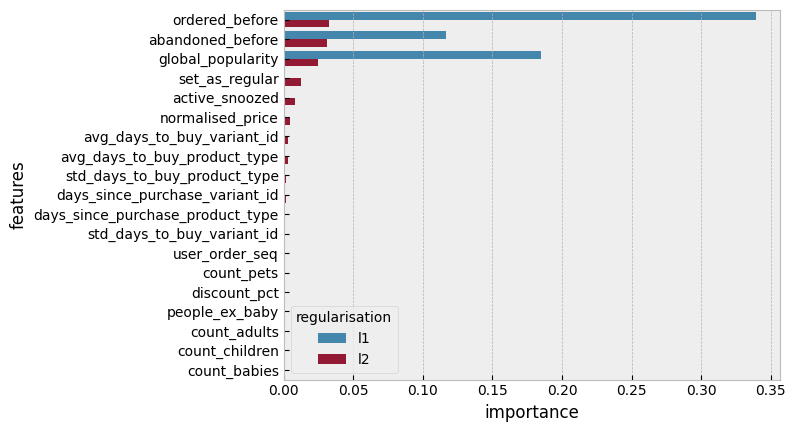

In [ ]:

lr_coeffs = pd.concat([lr_coeff_l2, lr_coeff_l1])
lr_coeffs ["features"] = pd.Categorical (lr_coeffs["features"])
lr_coeffs = lr_coeffs.sort_values (by=["importance"])
order_columns = lr_coeff_l2.sort_values (by="importance", ascending=False) ["features"]
sns.barplot(
    data=lr_coeffs, 
    x="importance", 
    y="features",
    hue="regularisation",
    order=order_columns,
)

- We observe how l1 and l2 has a different behaviour in how many features go to 0 
- Let's train the model getting rid of the non important variables based on Lasso (importance of 0)

c:\Users\eduez\AppData\Local\pypoetry\Cache\virtualenvs\zrive-ds-tukR1ct--py3.11\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eduez\AppData\Local\pypoetry\Cache\virtualenvs\zrive-ds-tukR1ct--py3.11\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


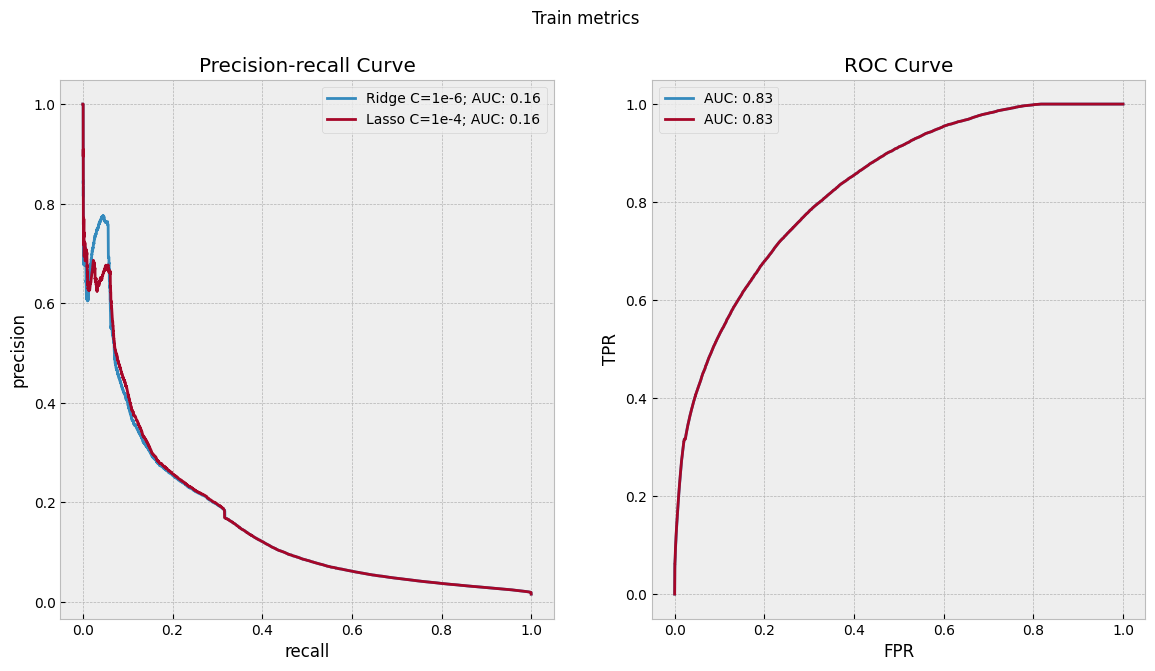

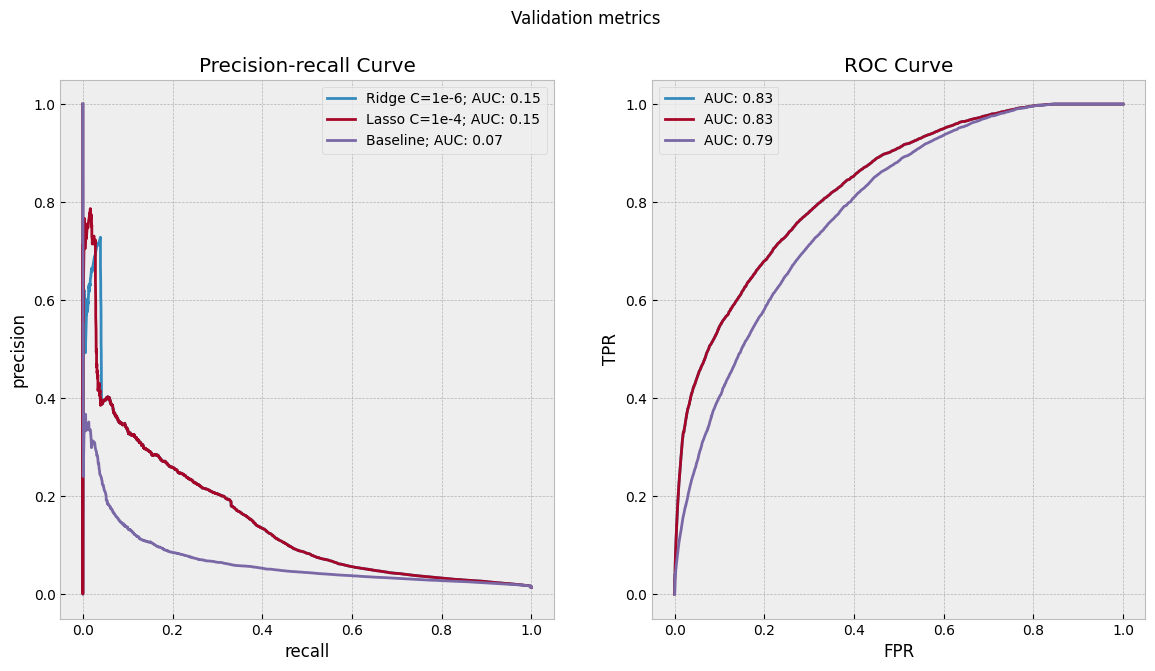

In [ ]:
reduced_cols = ["ordered_before", "abandoned_before", "global_popularity", "set_as_regular"]

fig1, ax1 = plt.subplots(1, 2, figsize=(14, 7))
fig1.suptitle("Train metrics")

fig2, ax2 = plt.subplots(1, 2, figsize=(14, 7))
fig2.suptitle("Validation metrics")

lrs = [
    make_pipeline(
        StandardScaler(), LogisticRegression(penalty="l2", C=1e-6)
    ),
    make_pipeline(
        StandardScaler(), LogisticRegression(penalty="l1", C=1e-4, solver="saga")
    ),
]

names = ["Ridge C=1e-6", "Lasso C=1e-4"]

for name, lr in zip(names, lrs):
    lr.fit(X_train[reduced_cols], y_train)
    train_proba = lr.predict_proba(X_train[reduced_cols])[:, 1]

    plot_metrics(
        name, y_pred=train_proba, y_test=train_df[label_col], figure=(fig1, ax1)
    )

    val_proba = lr.predict_proba(X_val[reduced_cols])[:, 1]
    
    plot_metrics(name, y_pred=val_proba, y_test=val_df[label_col], figure=(fig2, ax2))

plot_metrics(
    "Baseline",
    y_pred=val_df["global_popularity"], 
    y_test=val_df[label_col],
    figure=(fig2, ax2),
)

- Both l1 and l2 are clearly better than the baseline.
- We can train a linear model over a very limited subset of features (only 4) and get quite promising results.
- That’s a great result for an MVP: we improve the baseline with few features and a very simple model.

### Categorical encoding

In [24]:
feature_frame["vendor"].value_counts()

vendor
biona         146828
ecover        113018
method         79258
organix        74632
treeoflife     68920
               ...  
minky            599
vitalbaby        594
munchkin         422
freee            336
vicks            243
Name: count, Length: 264, dtype: int64

In [25]:
feature_frame["product_type"].value_counts()

product_type
tinspackagedfoods         226474
condimentsdressings       129749
ricepastapulses           128098
haircare                  114978
cookingingredientsoils    110686
                           ...  
babyfood12months            6797
householdsundries           6735
petcare                     4075
feedingweaning              2790
premixedcocktails           2620
Name: count, Length: 62, dtype: int64

- There are 264 and 62 types, which implies a high category

c:\Users\eduez\AppData\Local\pypoetry\Cache\virtualenvs\zrive-ds-tukR1ct--py3.11\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eduez\AppData\Local\pypoetry\Cache\virtualenvs\zrive-ds-tukR1ct--py3.11\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eduez\AppData\Local\pypoetry\Cache\virtualenvs\zrive-ds-tukR1ct--py3.11\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eduez\AppData\Local\pypoe

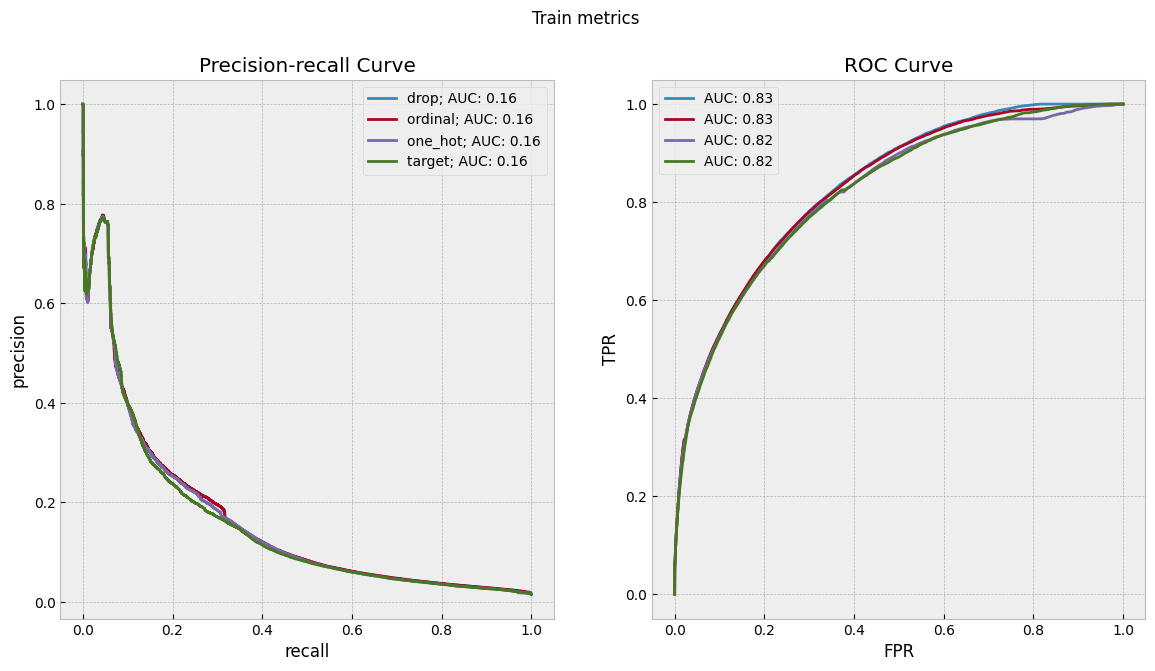

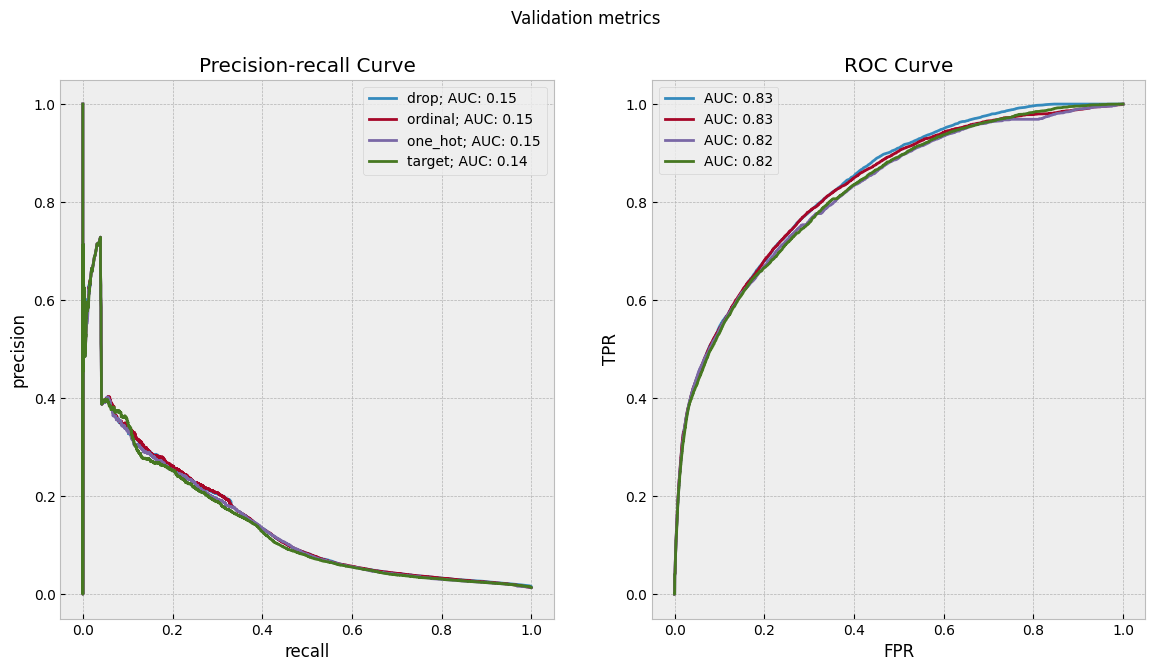

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, TargetEncoder


categorical_preprocessors = [
    ("drop", "drop"), # Quitar la columna
    ("ordinal", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)), # Reemplazar la categoría por un número con un orden
    ("one_hot", OneHotEncoder(handle_unknown="ignore", max_categories=20, sparse_output=False)), # Añado columnas pero hasta 20 aunque haya más y haya conflictos
    ("target", TargetEncoder(target_type="continuous")) # Gran riesgo de overfitting
]

fig1, ax1 = plt.subplots(1, 2, figsize=(14, 7))
fig1.suptitle("Train metrics")

fig2, ax2 = plt.subplots(1, 2, figsize=(14, 7))
fig2.suptitle("Validation metrics")

extended_cols = reduced_cols + categorical_cols

for name, categorical_preprocessor in categorical_preprocessors:
    preprocessor = ColumnTransformer(
        transformers=[
            ("numerical", "passthrough", reduced_cols), # No hacer nada a las numéricas
            ("categorical", categorical_preprocessor, categorical_cols),
        ]
    )

    lr = make_pipeline(
        preprocessor, StandardScaler(), LogisticRegression(penalty="l2", C=1e-6)
    )

    lr.fit(X_train[extended_cols], y_train)

    train_proba = lr.predict_proba(X_train[extended_cols])[:, 1]

    plot_metrics(
        name, y_pred=train_proba, y_test=train_df[label_col], figure=(fig1, ax1)
    )

    val_proba = lr.predict_proba(X_val[extended_cols])[:, 1]

    plot_metrics(
        name, y_pred=val_proba, y_test=val_df[label_col], figure=(fig2, ax2)
    )

- Resultados similares
- Los resultados con columnas categóricas son similares porque el modelo es simple y no aprende patrones complejos
- El modelo no es lo suficientemente complejo para hacer overfitting a los datos
- No hace falta regularisation